# Expansión de Hidrogénicas en Slaters

Darío Mitnik

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib qt
%matplotlib inline

from __future__ import division 


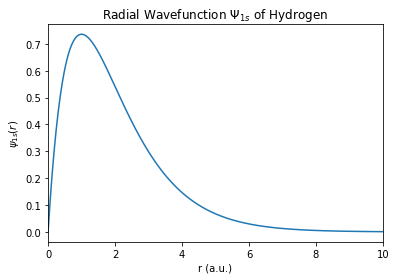

In [2]:
# Función Radial Hidrogénica (con hipergeométricas)

import sympy as sp

#Definimos los simbolos que vamos a usar.
r=sp.Symbol('r',positive=True)
l=sp.Symbol('l',positive=True,integer=True)
n=sp.Symbol('n',positive=True,integer=True)
z=sp.Symbol('z',positive=True,integer=True)


def R_hyp(n,l,z,r):
    rho=2*r*z/n 
    rnum = (2*z/n)**3 * sp.factorial(n+l)
    rden = (sp.factorial(2*l+1))**2 * 2*n * sp.factorial(n-l-1)
    rnorm = sp.sqrt(rnum/rden)
    rfunc = (rho)**l * sp.exp(-rho/2) * sp.hyper((-n+l+1,),(2*l+2,),(rho))
    R = rnorm * rfunc
    return R

# Definición de arrays para plotear

xmax=10.0
xmin=0.
npts=500
x = np.linspace(xmin,xmax,npts)
psiH = np.linspace(xmin,xmax,npts)
# Copiamos el array simbólico a numérico

for i in range(npts):
  psiH[i]=R_hyp(1,0,1,x[i])

# Ploteo

plt.plot(x,x*psiH);
plt.title("Radial Wavefunction $\Psi_{1s}$ of Hydrogen");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{1s}(r)$");
plt.xlim(xmin,xmax);


In [3]:
# Integral simbolica

from sympy import integrate

Integral = integrate( (r * R_hyp(1,0,1,r))**2, (r,0,float('inf'))).evalf()
print(Integral)

1.00000000000000


In [4]:
# Integral numerica

np.trapz((x*psiH)**2,x)


0.9999995336843267

## Expansión en Slaters  (sin nodos)

In [5]:
def Snz(n,eta,r):
    rnum = (2*eta)**(2*n + 1)
    rden = sp.factorial(2*n) 
    rnorm = sp.sqrt(rnum/rden)
    rfunc = r**(n-1) * sp.exp(-eta*r)  
    R = rnorm * rfunc
    return R


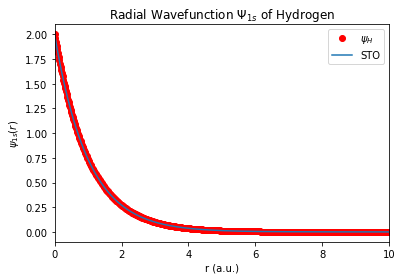

In [6]:
psiS = np.zeros(npts)

# Copiamos el array simbólico a numérico

for i in range(npts):
  psiS[i]=Snz(1,1,x[i])

# Ploteo

plt.plot(x,psiH,'ro',label='$\psi_H$');
plt.plot(x,psiS,label='STO');
plt.title("Radial Wavefunction $\Psi_{1s}$ of Hydrogen");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{1s}(r)$");
plt.legend()
plt.xlim(xmin,xmax);


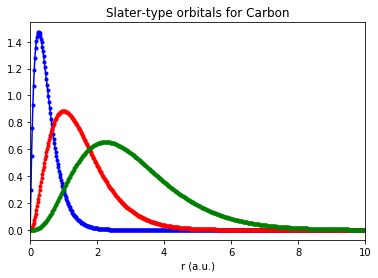

In [7]:
# Carbon Hidrogen-like

yC1s = np.zeros(npts)
yC2p = np.zeros(npts)
yC3d = np.zeros(npts)
STO1 = np.zeros(npts)
STO2 = np.zeros(npts)
STO3 = np.zeros(npts)

z=4
for i in range(npts):
    yC1s[i] = R_hyp(1,0,z,x[i])
    yC2p[i] = R_hyp(2,1,z,x[i])
    yC3d[i] = R_hyp(3,2,z,x[i])
    STO1[i] = Snz(1,z,x[i])
    STO2[i] = Snz(2,z/2,x[i])
    STO3[i] = Snz(3,z/3,x[i])
 
plt.plot(x,yC1s*x,'b');
plt.plot(x,yC2p*x,'r');
plt.plot(x,yC3d*x,'g');
plt.plot(x,STO1*x,'b.',linewidth='2.5');
plt.plot(x,STO2*x,'r.',linewidth='2.5');
plt.plot(x,STO3*x,'g.',linewidth='2.5');
plt.title("Slater-type orbitals for Carbon");
plt.xlabel("r (a.u.)");
plt.xlim(xmin,xmax);


# Expansión Hidrógenica en Slaters

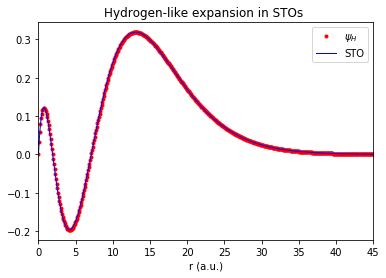

In [8]:
# Expansión 3s Hidrógeno 

# Definición de arrays para plotear

xmax=45.0
xmin=0.
npts=500
x = np.linspace(xmin,xmax,npts)

yappb = np.zeros(npts)
yH = np.zeros(npts)

nH=3
lH=0
zH=1
zS = zH/nH

for i in range(npts):    
    yH[i] = R_hyp(nH,lH,zH,x[i])
    yappb[i] = 1*Snz(1,zS,x[i]) - np.sqrt(12)*Snz(2,zS,x[i]) + np.sqrt(10)*Snz(3,zS,x[i])
    
plt.plot(x,yH*x,'r.',label='$\psi_H$');
plt.plot(x,yappb*x,'b',linewidth='1',label='STO');
plt.title("Hydrogen-like expansion in STOs ");
plt.xlabel("r (a.u.)");
plt.legend();
plt.xlim(xmin,xmax);


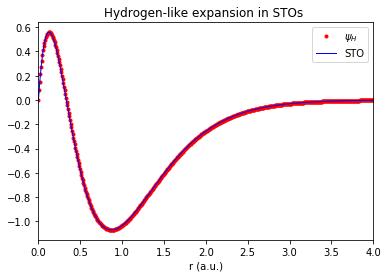

In [9]:
# Expansión 2s C-like  

# Definición de arrays para plotear

xmax=4.0
xmin=0.
npts=500
x = np.linspace(xmin,xmax,npts)

yappb = np.zeros(npts)
yH = np.zeros(npts)

nH=2
lH=0
zH=6
zS = zH/nH

for i in range(npts):    
    yH[i] = R_hyp(nH,lH,zH,x[i])
    yappb[i] = 1*Snz(1,zS,x[i]) - np.sqrt(3)*Snz(2,zS,x[i])
    
plt.plot(x,yH*x,'r.',label='$\psi_H$');
plt.plot(x,yappb*x,'b',linewidth='1',label='STO');
plt.title("Hydrogen-like expansion in STOs ");
plt.xlabel("r (a.u.)");
plt.legend();
plt.xlim(xmin,xmax);


### Caso General

In [10]:
# Expresión analítica de los coeficientes

def acfS(n,l,N):
    sgn = (-1)**(N-l-1)
    rnum = sp.factorial(n-l-1) * sp.factorial(n+l) * sp.factorial(2*N)
    rden = 2*n
    rf1 = sp.sqrt(rnum/rden)
    rf2 = sp.factorial(N-l-1) * sp.factorial(n-N) * sp.factorial(N+l)
    an = sgn*rf1/rf2
    return an

Coefficients (^2):=  [   54.         -1344.          5554.28571429 -5091.42857143   715.             0.        ]


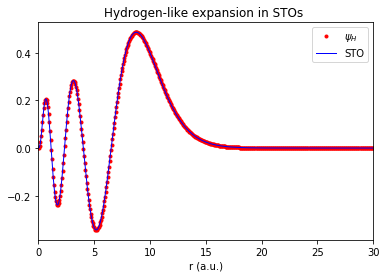

In [28]:
# Wavefunction Reconstruction  

# Definición de arrays para plotear

xmax=30.0
xmin=0.
npts=500
x = np.linspace(xmin,xmax,npts)


# Copiamos el array simbólico a numérico

yappb = np.zeros(npts)
yH = np.zeros(npts)

nH=7
lH=2
zH=9
zS = zH/nH

acS = np.zeros(nH-lH+1)

count = 0
for N in range(lH+1,nH+1):   
    acS[count]=acfS(nH,lH,N)
    count+=1

print 'Coefficients (^2):= ',np.sign(acS)*acS**2

for i in range(npts):    
    yH[i] = R_hyp(nH,lH,zH,x[i])
    yS = 0.0
    count = 0
    for N in range(lH+1,nH+1):
        yS = yS + acS[count]*Snz(N,zS,x[i])
        count+=1
       
    yappb[i] = yS
     
plt.plot(x,yH*x,'r.',label='$\psi_H$');
plt.plot(x,yappb*x,'b',linewidth='1',label='STO');
plt.title("Hydrogen-like expansion in STOs ");
plt.xlabel("r (a.u.)");
plt.legend();
plt.xlim(xmin,xmax);


### Cálculo numérico de los coeficientes de expansión

In [13]:
def RHS(nH,lH,zH,n,x):
    
    zS = zH/nH    

    npts = len(x)
    rint = np.zeros(npts)

    for i in range(npts):
        rint[i]=Snz(n,zS,x[i])*R_hyp(nH,lH,zH,x[i])  
        
    coeff = np.trapz(rint*x*x,x)
    return coeff

In [14]:
def Sij(nl,nr,zS,x):
    
    npts = len(x)
    rint = np.zeros(npts)

    for i in range(npts):
        rint[i]=Snz(nl,zS,x[i])*Snz(nr,zS,x[i])
        
    coeff = np.trapz(rint*x*x,x)
    return coeff

In [15]:
# Preparing matrices

nH=3
lH=0
zH=1
zS = zH/nH

msize = nH-lH
A = np.zeros([msize,msize])
B = np.zeros([msize])

ni = lH+1
for i in range(msize):   
    B[i] = RHS(nH,lH,zH,ni,x)
    nj = lH+1
    for j in range(msize):
        A[i,j]= Sij(ni,nj,zS,x)
        nj = nj+1
    ni = ni+1



In [19]:
print A

[[ 0.99999995  0.86602542  0.63245553]
 [ 0.86602542  1.          0.91287091]
 [ 0.63245553  0.91287091  0.99999988]]


In [20]:
print B

[ -1.14686910e-07   2.88675097e-01   6.32455230e-01]


In [18]:
# Solve

solution = np.linalg.solve(A,B)
print 'Coefficients (^2):= ',np.sign(solution)*solution**2



Coefficients (^2):=  [  1. -12.  10.]


In [ ]:
# chequeo aumentando las dimensiones

In [21]:
# Preparing matrices

nH=3
lH=0
zH=1
zS = zH/nH

msize = nH-lH+3
A = np.zeros([msize,msize])
B = np.zeros([msize])

ni = lH+1
for i in range(msize):   
    B[i] = RHS(nH,lH,zH,ni,x)
    nj = lH+1
    for j in range(msize):
        A[i,j]= Sij(ni,nj,zS,x)
        nj = nj+1
    ni = ni+1


In [22]:
print A

[[ 0.99999995  0.86602542  0.63245553  0.42257712  0.26726121  0.16283465]
 [ 0.86602542  1.          0.91287091  0.73192497  0.54006144  0.37604995]
 [ 0.63245553  0.91287091  0.99999988  0.93541386  0.78880902  0.61790998]
 [ 0.42257712  0.73192497  0.93541386  0.99999795  0.94867654  0.82570437]
 [ 0.26726121  0.54006144  0.78880902  0.94867654  0.99997765  0.95736594]
 [ 0.16283465  0.37604995  0.61790998  0.82570437  0.95736594  0.99983228]]


In [23]:
print B

[ -1.14686910e-07   2.88675097e-01   6.32455230e-01   8.45152994e-01
   8.90866650e-01   8.14162347e-01]


In [24]:
# Solve

solution = np.linalg.solve(A,B)
print 'Coefficients (^2):= ',np.sign(solution)*solution**2


Coefficients (^2):=  [  1.00000000e+00  -1.20000000e+01   1.00000000e+01  -1.47628185e-21
   8.46124943e-22  -8.37911992e-23]
